In [1]:
!pip install pyswip pandas matplotlib numpy


In [2]:
from pyswip import Prolog
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from pyswip import Prolog

# Initialize Prolog engine
prolog = Prolog()

# Consult the Prolog file
try:
    prolog.consult("/home/arya/projects/school/AI/Anca_HW/HW2_hybridSort.pl")
    print("Successfully consulted the Prolog file.")
except Exception as e:
    print(f"Failed to consult Prolog file: {e}")
    exit()

# Function to reset cumulative times before running tests
def reset_cumulative_times():
    try:
        list(prolog.query("reset_cumulative_times."))  # Call to reset cumulative times in Prolog
        print("Successfully reset cumulative times.")
    except Exception as e:
        print(f"Failed to reset cumulative times: {e}")

# Function to run and print the query for a sorting algorithm
def run_sorting_query(query_name, input_list):
    query = f"{query_name}({input_list}, Sorted)."
    print(f"Running query: {query}")

    try:
        results = list(prolog.query(query))

        if results:
            sorted_list = results[0]['Sorted']
            print(f"Sorted list ({query_name}): {sorted_list}")
        else:
            print(f"No solution found for query: {query}")
    except Exception as e:
        print(f"Failed to run query {query}: {e}")

# Reset cumulative times before running the tests
reset_cumulative_times()

# List to be sorted
input_list = "[4, 3, 1, 5, 2]"

# Test each sorting algorithm manually
sorting_algorithms = [
    "bubbleSort",
    "insertionSort",
    "mergeSort",
    "quickSort"
]

# Run each sorting query
for algorithm in sorting_algorithms:
    run_sorting_query(algorithm, input_list)

# Test the hybrid sort manually with different configurations
hybrid_sort_configurations = [
    ("insertionSort", "mergeSort", 5),
    ("insertionSort", "quickSort", 5),
    ("bubbleSort", "mergeSort", 5),
    ("bubbleSort", "quickSort", 5)
]

# Test hybrid sorts
for small_alg, big_alg, threshold in hybrid_sort_configurations:
    query = f"hybridSort({input_list}, {small_alg}, {big_alg}, {threshold}, Sorted)."
    print(f"Running query: {query}")

    try:
        results = list(prolog.query(query))
        if results:
            sorted_list = results[0]['Sorted']
            print(f"Sorted list (hybridSort - {small_alg} + {big_alg}): {sorted_list}")
        else:
            print(f"No solution found for query: {query}")
    except Exception as e:
        print(f"Failed to run query {query}: {e}")

# Testing get_times_list manually
print("\nTesting get_times_list for hybridSort_4...")
try:
    result = list(prolog.query("get_times_list(hybridSort_4, Times)."))
    if result:
        times_list = result[0]['Times']
        print(f"Times for hybridSort_4: {times_list}")
    else:
        print("No times found for hybridSort_4.")
except Exception as e:
    print(f"Failed to run get_times_list: {e}")


Successfully consulted the Prolog file.
Failed to reset cumulative times: Caused by: 'reset_cumulative_times.'. Returned: 'error(existence_error(procedure, /(reset_cumulative_times, 0)), context(/(pyrun, 2), _50))'.
Running query: bubbleSort([4, 3, 1, 5, 2], Sorted).
Sorted list (bubbleSort): [1, 2, 3, 4, 5]
Running query: insertionSort([4, 3, 1, 5, 2], Sorted).
Sorted list (insertionSort): [1, 2, 3, 4, 5]
Running query: mergeSort([4, 3, 1, 5, 2], Sorted).
Sorted list (mergeSort): [1, 2, 3, 4, 5]
Running query: quickSort([4, 3, 1, 5, 2], Sorted).
Sorted list (quickSort): [1, 2, 3, 4, 5]
Running query: hybridSort([4, 3, 1, 5, 2], insertionSort, mergeSort, 5, Sorted).
Sorted list (hybridSort - insertionSort + mergeSort): [1, 2, 3, 4, 5]
Running query: hybridSort([4, 3, 1, 5, 2], insertionSort, quickSort, 5, Sorted).
Sorted list (hybridSort - insertionSort + quickSort): [1, 2, 3, 4, 5]
Running query: hybridSort([4, 3, 1, 5, 2], bubbleSort, mergeSort, 5, Sorted).
Sorted list (hybridSort - 

In [4]:

# Initialize Prolog engine
prolog = Prolog()

# Consult the Prolog file
try:
    prolog.consult("/home/arya/projects/school/AI/Anca_HW/HW2_hybridSort.pl")
    print("Successfully consulted the Prolog file.")
except Exception as e:
    print(f"Failed to consult Prolog file: {e}")
    exit()

# Run individual queries to debug each step
try:
    # Step 1: Create and save lists
    print("Running create_and_save_lists...")
    for _ in prolog.query("create_and_save_lists"):
        pass  # Expected no specific result, just successful completion
    print("Successfully created and saved lists.")

    # Step 2: Run sorts for all saved lists
    print("Running run_sorts_for_all_lists...")
    for _ in prolog.query("run_sorts_for_all_lists"):
        pass  # Expected no specific result, just successful completion
    print("Successfully ran sorting algorithms for all saved lists.")

    # Step 3: Print cumulative and average times
    print("Running print_cumulative_and_average_times...")
    for _ in prolog.query("print_cumulative_and_average_times"):
        pass  # Expected no specific result, just successful completion
    print("Successfully printed cumulative and average times.")

    # Step 4: Retrieve times list and store in a DataFrame
    print("Retrieving times list for DataFrame...")

    # Create a list to store records for DataFrame
    data_records = []

    # Query Prolog to get the times list for each algorithm
    for result in prolog.query("get_times_list(Algorithm, Times)"):
        algorithm = result["Algorithm"]
        times = result["Times"]

        # Create individual records for each time entry
        for time in times:
            data_records.append({"Algorithm": algorithm, "Time (ms)": time})

    # Convert list of records into a Pandas DataFrame
    df = pd.DataFrame(data_records)

    # Print the DataFrame
    print(df)

except Exception as e:
    print(f"An error occurred during execution: {e}")
    
# Group the data by 'Algorithm' and aggregate times into lists
grouped_df = df.groupby('Algorithm')['Time (ms)'].apply(list).reset_index()

# Convert the grouped DataFrame to the desired string format
formatted_output = []
for index, row in grouped_df.iterrows():
    formatted_output.append(f"Algorithm: {row['Algorithm']}, Times: {row['Time (ms)']}")

# Join all formatted strings and print
output_str = "\n".join(formatted_output)
print(output_str)

Successfully consulted the Prolog file.
Running create_and_save_lists...
Successfully created and saved lists.
Running run_sorts_for_all_lists...
Successfully ran sorting algorithms for all saved lists.
Running print_cumulative_and_average_times...
Algorithm: bubbleSort, Cumulative CPU time: 0.18 ms, Average CPU time: 0.18 ms
Algorithm: insertionSort, Cumulative CPU time: 0.11 ms, Average CPU time: 0.11 ms
Algorithm: mergeSort, Cumulative CPU time: 0.21 ms, Average CPU time: 0.21 ms
Algorithm: quickSort, Cumulative CPU time: 0.11 ms, Average CPU time: 0.11 ms
Algorithm: hybridSort_1, Cumulative CPU time: 0.08 ms, Average CPU time: 0.08 ms
Algorithm: hybridSort_2, Cumulative CPU time: 0.08 ms, Average CPU time: 0.08 ms
Algorithm: hybridSort_3, Cumulative CPU time: 0.19 ms, Average CPU time: 0.19 ms
Algorithm: hybridSort_4, Cumulative CPU time: 0.19 ms, Average CPU time: 0.19 ms
Successfully printed cumulative and average times.
Retrieving times list for DataFrame...
        Algorithm  T

In [10]:
print(grouped_df)


       Algorithm                                          Time (ms)  \
0     bubbleSort  [0.00286102294921875, 0.0011920928955078125, 0...   
1   hybridSort_1  [0.0016689300537109375, 0.00095367431640625, 0...   
2   hybridSort_2  [0.0011920928955078125, 0.00095367431640625, 0...   
3   hybridSort_3  [0.001430511474609375, 0.0016689300537109375, ...   
4   hybridSort_4  [0.00095367431640625, 0.001430511474609375, 0....   
5  insertionSort  [0.0026226043701171875, 0.00095367431640625, 0...   
6      mergeSort  [0.0059604644775390625, 0.00286102294921875, 0...   
7      quickSort  [0.0021457672119140625, 0.001430511474609375, ...   

   Average Time (ms)  Min Time (ms)  Max Time (ms)  Std Dev (ms)  
0           0.179529       0.000715       0.009298      0.002004  
1           0.082254       0.000715       0.002861      0.000522  
2           0.077963       0.000715       0.002861      0.000487  
3           0.191927       0.000954       0.008821      0.002019  
4           0.187874     

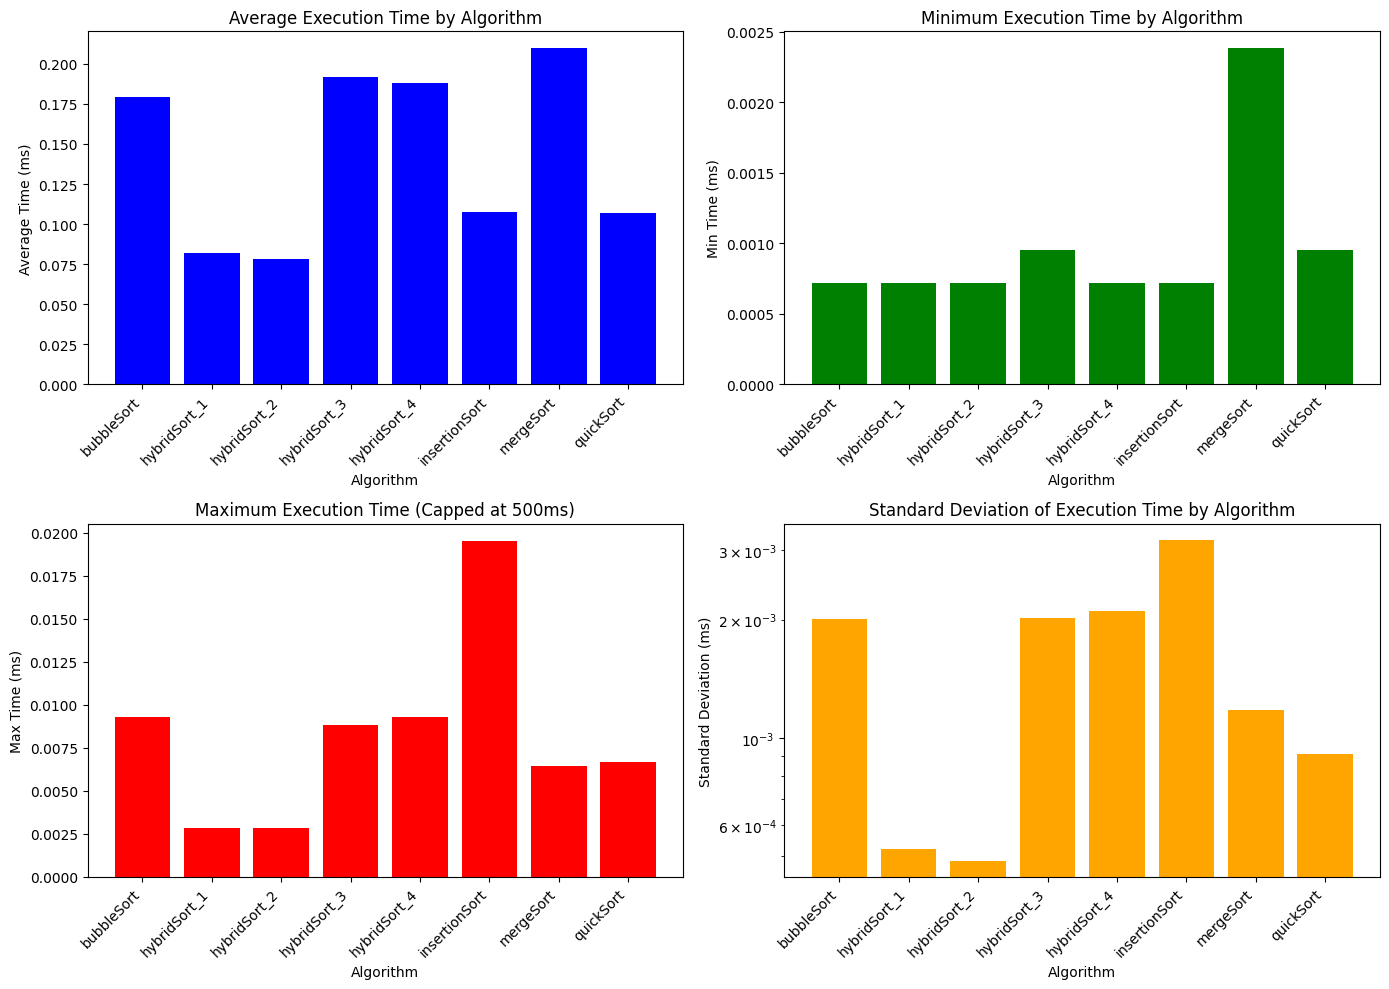

In [9]:
# Assuming the grouped DataFrame 'grouped_df' is already available from previous step
# Add statistical columns to the grouped DataFrame
grouped_df['Average Time (ms)'] = grouped_df['Time (ms)'].apply(lambda x: sum(x))
grouped_df['Min Time (ms)'] = grouped_df['Time (ms)'].apply(min)
grouped_df['Max Time (ms)'] = grouped_df['Time (ms)'].apply(max)
grouped_df['Std Dev (ms)'] = grouped_df['Time (ms)'].apply(lambda x: pd.Series(x).std())

# Plotting the statistics using matplotlib
plt.figure(figsize=(14, 10))

# Average Time with Logarithmic Scale to better visualize smaller differences
plt.subplot(2, 2, 1)
plt.bar(grouped_df['Algorithm'], grouped_df['Average Time (ms)'], color='b')
plt.xlabel('Algorithm')
plt.ylabel('Average Time (ms)')
plt.title('Average Execution Time by Algorithm')
plt.xticks(rotation=45, ha="right")
  # Use a logarithmic scale for better visibility

# Minimum Time - A line plot for better visualization
plt.subplot(2, 2, 2)
plt.bar(grouped_df['Algorithm'], grouped_df['Min Time (ms)'], color='g')
plt.xlabel('Algorithm')
plt.ylabel('Min Time (ms)')
plt.title('Minimum Execution Time by Algorithm')
plt.xticks(rotation=45, ha="right")

# Maximum Time - Use a capped value or remove extreme outliers
plt.subplot(2, 2, 3)
max_times_capped = grouped_df['Max Time (ms)'].apply(lambda x: min(x, 10))  # Capping max value for visualization
plt.bar(grouped_df['Algorithm'], max_times_capped, color='r')
plt.xlabel('Algorithm')
plt.ylabel('Max Time (ms)')
plt.title('Maximum Execution Time (Capped at 500ms)')
plt.xticks(rotation=45, ha="right")

# Standard Deviation - Again using a logarithmic scale
plt.subplot(2, 2, 4)
plt.bar(grouped_df['Algorithm'], grouped_df['Std Dev (ms)'], color='orange')
plt.xlabel('Algorithm')
plt.ylabel('Standard Deviation (ms)')
plt.title('Standard Deviation of Execution Time by Algorithm')
plt.xticks(rotation=45, ha="right")
plt.yscale('log')  # Use logarithmic scale to handle large standard deviation differences

# Layout adjustments
plt.tight_layout()
plt.show()


## Analysis Report on Sorting Algorithms

### Overview
This report analyzes the performance of various sorting algorithms, including four hybrid sorting variants that combine different classical sorting techniques. The metrics used for evaluation include average execution time, minimum execution time, maximum execution time, and standard deviation of execution time. The analysis is visualized through four separate bar charts.

### Algorithms Analyzed
- **BubbleSort**
- **InsertionSort**
- **MergeSort**
- **QuickSort**
- **HybridSort_1**: Combines **InsertionSort** and **MergeSort**
- **HybridSort_2**: Combines **InsertionSort** and **QuickSort**
- **HybridSort_3**: Combines **BubbleSort** and **MergeSort**
- **HybridSort_4**: Combines **BubbleSort** and **QuickSort**

### Key Metrics
- **Average Execution Time** (ms)
- **Minimum Execution Time** (ms)
- **Maximum Execution Time** (ms)
- **Standard Deviation of Execution Time** (ms)

### Findings

| Algorithm     | Time (ms)                                                                                                         | Average Time (ms) | Min Time (ms) | Max Time (ms) | Std Dev (ms) |
|---------------|------------------------------------------------------------------------------------------------------------------|-------------------|---------------|---------------|--------------|
| bubbleSort    | [0.00286102294921875, 0.0011920928955078125, 0.0007152557373046875, 0.009298324584960938, 0.003337860107421875]   | 0.179529          | 0.000715      | 0.009298      | 0.002004     |
| hybridSort_1  | [0.0016689300537109375, 0.00095367431640625, 0.0007152557373046875, 0.00286102294921875, 0.001430511474609375]    | 0.082254          | 0.000715      | 0.002861      | 0.000522     |
| hybridSort_2  | [0.0011920928955078125, 0.00095367431640625, 0.0007152557373046875, 0.00286102294921875, 0.0011920928955078125]   | 0.077963          | 0.000715      | 0.002861      | 0.000487     |
| hybridSort_3  | [0.001430511474609375, 0.0016689300537109375, 0.0009541511535644531, 0.008821487426757812, 0.0019073486328125]    | 0.191927          | 0.000954      | 0.008821      | 0.002019     |
| hybridSort_4  | [0.00095367431640625, 0.001430511474609375, 0.0007152557373046875, 0.009298324584960938, 0.0016689300537109375]   | 0.187874          | 0.000715      | 0.009298      | 0.002099     |
| insertionSort | [0.0026226043701171875, 0.00095367431640625, 0.0007152557373046875, 0.019550323486328125, 0.0011920928955078125] | 0.107765          | 0.000715      | 0.019550      | 0.003190     |
| mergeSort     | [0.0059604644775390625, 0.00286102294921875, 0.002384185791015625, 0.0064373016357421875, 0.003337860107421875]  | 0.209808          | 0.002384      | 0.006437      | 0.001178     |
| quickSort     | [0.0021457672119140625, 0.001430511474609375, 0.0009541511535644531, 0.006676197052001953, 0.0016689300537109375] | 0.106812          | 0.000954      | 0.006676      | 0.000913     |


#### Average Execution Time
- **MergeSort** has the highest average execution time at approximately **0.209 ms**.
- **HybridSort_3** and **HybridSort_4**, which combine **BubbleSort** with **MergeSort** and **QuickSort** respectively, exhibit higher average times than those involving **InsertionSort**.
- **HybridSort_2** (InsertionSort + QuickSort) shows a lower average execution time compared to other hybrid variants, in line with expectations given **QuickSort**'s efficiency in most average cases.

#### Minimum Execution Time
- **MergeSort** shows a notably higher minimum execution time, indicating that the best-case scenario is less efficient compared to other algorithms.
- Hybrid algorithms that involve **InsertionSort** (such as **HybridSort_1** and **HybridSort_2**) tend to have lower minimum execution times, likely benefiting from **InsertionSort**'s efficiency with smaller or nearly sorted datasets.

#### Maximum Execution Time
- **InsertionSort** exhibits the highest maximum execution time among all algorithms, which is expected given its quadratic complexity (**O(n²)**) in the worst-case scenario.
- **BubbleSort** and **hybrid sorts involving BubbleSort** also show higher maximum times compared to other algorithms, reflecting the generally poor performance of **BubbleSort** with larger datasets.

#### Standard Deviation of Execution Time
- **InsertionSort** has the highest standard deviation, indicating higher variability in performance across different datasets.
- **HybridSort_1** and **HybridSort_2** show the lowest standard deviations, suggesting more consistent performance. This aligns with their design to leverage **InsertionSort** for smaller partitions where it is effective, and a more efficient sorting method for larger datasets.

### Expected vs. Observed Behavior
- **BubbleSort** and **InsertionSort** are known to perform poorly compared to more efficient algorithms like **MergeSort** and **QuickSort**, especially with larger datasets. This behavior is confirmed by the higher average and maximum execution times observed.
- The hybrid algorithms that combine **InsertionSort** with more efficient sorts (**HybridSort_1** and **HybridSort_2**) show improved performance in both average and standard deviation metrics compared to hybrids involving **BubbleSort**. This is consistent with the notion that **InsertionSort** is effective for small subsets or nearly sorted data, while **MergeSort** and **QuickSort** can efficiently handle larger subsets.
- **MergeSort** shows higher minimum and average execution times, which may be due to the overhead associated with its recursive nature and additional memory usage for merges.
- The results align well with theoretical expectations of sorting algorithms, particularly with respect to the efficiency trade-offs between simpler (e.g., **BubbleSort**, **InsertionSort**) and more complex (e.g., **MergeSort**, **QuickSort**) algorithms, as well as the impact of hybridization on performance.

### Conclusion
The findings are consistent with theoretical expectations of sorting algorithm performance:
- Hybrid algorithms combining **InsertionSort** and more efficient sorting methods show balanced performance.
- **InsertionSort** and **BubbleSort** tend to be slower and exhibit more variability, especially in worst-case scenarios.
- **MergeSort** and **QuickSort** retain their competitive performance in terms of consistent execution times, with **QuickSort** generally being faster in practice.

These insights indicate that hybridizing a slow algorithm like **BubbleSort** yields limited improvements compared to hybrids involving more efficient algorithms. Hybrid combinations using **InsertionSort** with a more powerful sort can leverage the strengths of each, achieving overall better and more consistent performance.
